In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from matplotlib.animation import FuncAnimation
import random

To get used to this, first I'll simulate the behaviour of a circle moving around 2 dimensions using the Euler-Maruyama approach.

In [7]:
# Parameters
v0 = 1.0       # Velocity magnitude
D_T = 1e-3     # Translational diffusivity
D_R = 0.1      # Rotational diffusivity
dt = 0.01      # Time step
brownian_step = np.sqrt(2 * D_T * dt)
brownian_r_step = np.sqrt(2 * D_R * dt)
T = 200.0      # Total simulation time
steps = int(T / dt)
ell = 0.5      # Particle length
channell = 1.0 # Channel height

# Initial conditions
X0 = np.array([1.0, 0.5])
θ0 = 0.0

def fbottom(θ, l, cl):
    return 0.5 * l * abs(np.sin(θ))

def fbottomder(θ, l):
    return 0.5 * l * np.sin(θ) * np.cos(θ) / abs(np.sin(θ))

def ftop(θ, l, cl):
    return cl - 0.5 * l * abs(np.sin(θ))

def ftopder(θ, l):
    return -0.5 * l * np.sin(θ) * np.cos(θ) / abs(np.sin(θ))


def find_intersection(p1, p2, l, cl, boundary_func):
    def error_function(t):
        return boundary_func(p1[0] + t * (p2[0] - p1[0]), l, cl) - \
               (p1[1] + t * (p2[1] - p1[1]))
    
    solution = root_scalar(error_function, bracket=[0, 1], method='bisect')
    
    if solution.converged:
        t_sol = solution.root
        return np.array([p1[0] + t_sol * (p2[0] - p1[0]), 
                         p1[1] + t_sol * (p2[1] - p1[1])])
    return None



def give_ref(intersection_point, p2, l, boundary_deriv):
    n = np.array([1, boundary_deriv(intersection_point[0], l)])
    n = n / np.linalg.norm(n)  # Normalize
    
    projection = intersection_point + np.dot(p2 - intersection_point, n) * n
    reflection = 2 * projection - p2
    return reflection


def apply_boundary(X, dX, θ, dθ, l, cl):
    Xn = X + dX
    θn = θ + dθ
    P1 = np.array([θ, X[1]])
    P2 = np.array([θn, Xn[1]])

    while P2[1] < 0.5 * l:
        intersection = find_intersection(P1, P2, l, cl, fbottom)
        if intersection is None:
            break
        P2 = give_ref(intersection, P2, l, fbottomder)
        Xn[1] = P2[1]
        θn = P2[0]

    while P2[1] > cl - 0.5 * l:
        intersection = find_intersection(P1, P2, l, cl, ftop)
        if intersection is None:
            break
        P2 = give_ref(intersection, P2, l, ftopder)
        Xn[1] = P2[1]
        θn = P2[0]

    return Xn, θn

def simulate(X0, θ0):
    X, θ = np.copy(X0), θ0
    trajectory = np.zeros((steps, 3))

    for it in range(steps):
        dX = v0 * np.array([np.cos(θ), np.sin(θ)]) * dt + \
             brownian_step * np.random.randn(2)
        dθ = brownian_r_step * np.random.randn()

        X, θ = apply_boundary(X, dX, θ, dθ, ell, channell)

        trajectory[it, 0] = X[0]
        trajectory[it, 1] = X[1]
        trajectory[it, 2] = θ

    return trajectory

num_simulations = 30
xtrajs = []
ytrajs = []
θtrajs = []

np.random.seed(1000)
seeds = np.random.randint(1000, 9999, num_simulations)

for seed in seeds:
    np.random.seed(seed)
    X0 = np.array([np.random.rand(), 0.25 + np.random.rand() * 0.5])
    θ0 = np.random.rand() * 2 * np.pi
    traj = simulate(X0, θ0)
    
    xtrajs.append(traj[:, 0])
    ytrajs.append(traj[:, 1])
    θtrajs.append(traj[:, 2] % (2 * np.pi))

ValueError: f(a) and f(b) must have different signs

In [74]:
v0 = 1.0 # velocity
D_T = 4
D_R = 0.1
dt = 0.01
brownian_step = np.sqrt(2 * D_T * dt)
brownian_r_step = np.sqrt(2 * D_R * dt)
T = 100
steps = int(T/dt)
ell = 0.5
channell = 1.0

X0 = np.array([1.0, 0.5])
theta0 = 0.0

fbottom = lambda theta, l, cl: 0.5 * l * abs(np.sin(theta))
fbottomder = lambda theta, l: 0.5 * l * np.sin(theta) * np.cos(theta) / abs(np.sin(theta))
ftop = lambda theta, l, cl: cl - 0.5 * l * abs(np.sin(theta))
ftopder = lambda theta, l: -0.5 * l * np.sin(theta) * np.cos(theta) / abs(np.sin(theta))



In [182]:
v0 = 1.0 # velocity
D_T = 4
D_R = 0.1
dt = 0.01
brownian_step = np.sqrt(2 * D_T * dt)
brownian_r_step = np.sqrt(2 * D_R * dt)
T = 5
steps = int(T/dt)
ell = 0.5
channell = 1.0

X0 = np.array([1.0, 0.5])
theta0 = np.pi

fbottom = lambda theta, l, cl: 0.5 * l * abs(np.sin(theta))
fbottomder = lambda theta, l: 0.5 * l * np.sin(theta) * np.cos(theta) / abs(np.sin(theta))
ftop = lambda theta, l, cl: cl - 0.5 * l * abs(np.sin(theta))
ftopder = lambda theta, l: -0.5 * l * np.sin(theta) * np.cos(theta) / abs(np.sin(theta))

def find_intersection(p1, p2, l, cl, boundary_func):
    def error_function(t):
        return boundary_func(p1[0] + t * (p2[0] - p1[0]), l, cl) - \
            (p1[1] + t * (p2[1] - p1[1]))
    solution = root_scalar(error_function, bracket=[0,1], method='bisect')

    if solution.converged:
        t_sol = solution.root
        return np.array([p1[0] + t_sol * (p2[0] - p1[0]),
                         p1[1] + t_sol * (p2[1] - p1[1])])
    return None

def give_ref(intersection_point, p2, l, boundary_deriv):
    n = np.array([1, boundary_deriv(intersection_point[0], l)])
    n = n/np.linalg.norm(n)

    projection = intersection_point + np.dot(p2 - intersection_point, n) * n
    reflection = 2 * projection - p2
    return reflection


def apply_boundary(X, dX, theta, dtheta, ell, channell):
    Xn = X + dX
    thetan = theta + dtheta
    P1 = np.array([theta, X[1]])
    P2 = np.array([thetan, Xn[1]])

    while P2[1] - fbottom(P2[0], ell, channell) < 0: # Below bottom boundary
        print("Violated bottom boundary", P2, fbottom(P2[0], ell, channell))
        intersection = find_intersection(P1, P2, ell, channell, fbottom)
        if intersection is None:
            break
        print(intersection)
        P2 = give_ref(intersection, P2, ell, fbottomder)
        print("New coordinates", P2, )
        Xn[1] = P2[1]
        thetan = P2[0]

    while P2[1] - ftop(P2[0], ell, channell) > 0: # Above top boundary
        print("Violated top boundary", P2, ftop(P2[0], ell, channell))
        intersection = find_intersection(P1, P2, ell, channell, ftop)
        if intersection is None:
            break
        print("intersection", intersection)
        P2 = give_ref(intersection, P2, ell, ftopder)
        print("New coordinates", P2)
        Xn[1] = P2[1]
        thetan = P2[0]
    
    return Xn, thetan


    
def simulate(X0, theta0):
    X, theta = np.copy(X0), theta0
    trajectory = np.zeros((steps, 3))

    for it in range(steps):
        dX = v0 * np.array([np.cos(theta), np.sin(theta)]) * dt + brownian_step * np.random.randn(2)
        dtheta = brownian_r_step * np.random.randn()

        X, theta = apply_boundary(X, dX, theta, dtheta, ell, channell)
        trajectory[it, 0] = X[0]
        trajectory[it, 1] = X[1]
        trajectory[it, 2] = theta

    return trajectory

num_simulations = 10
xtrajs = []
ytrajs = []
θtrajs = []


for sim in range(num_simulations):

    traj = simulate(X0, θ0)
    
    xtrajs.append(traj[:, 0])
    ytrajs.append(traj[:, 1])
    θtrajs.append(traj[:, 2] % (2 * np.pi))


Violated top boundary [5.34642164 1.04714607] 0.7985887186918985
intersection [5.31575381 0.79414225]
New coordinates [5.41557512 0.55964884]
Violated top boundary [5.3831275  1.08462385] 0.8041592893755419
intersection [5.40323192 0.8073227 ]
New coordinates [5.47028257 0.53749994]
Violated bottom boundary [ 5.33812546 -0.12165095] 0.2026329966174198
[5.40666959 0.19212855]
New coordinates [5.43942439 0.51163284]
Violated bottom boundary [ 5.5179474  -0.11700304] 0.1731771504364293
[5.45576511 0.18404697]
New coordinates [5.61352313 0.44788433]
Violated bottom boundary [5.63426563 0.09369561] 0.1510815063973655
[5.68064424 0.14168447]
New coordinates [5.65700513 0.2040952 ]
Violated bottom boundary [ 5.74351202 -0.33636909] 0.12846393579267573
[5.66653162 0.14457711]
New coordinates [5.92571096 0.55696199]
Violated bottom boundary [ 5.96826657 -0.03796252] 0.07743480213624784
[5.97942439 0.07477776]
New coordinates [6.02036131 0.18041411]
Violated top boundary [5.82634409 0.89379571] 

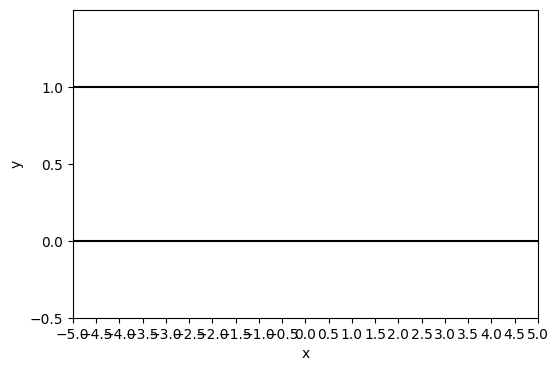

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Visualization parameters
trailsize = 40  # How many previous points to show
msize1 = 6      # Size of the moving particle
Lmin, Lmax = -5, 5  # Domain limits

# Extract single trajectory (first simulation run)
x_proj = np.array(xtrajs[0])  # X coordinates
y_proj = np.array(ytrajs[0])  # Y coordinates
θ_proj = np.array(θtrajs[0])  # Angles

# Initialize figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(Lmin, Lmax)
ax.set_ylim(-0.5, channell + 0.5)
ax.set_xticks(np.arange(Lmin, Lmax + 0.5, 0.5))
ax.set_yticks(np.arange(-0.5, channell + 0.5, 0.5))
ax.set_xlabel("x")
ax.set_ylabel("y")

# Draw channel boundaries
ax.plot([Lmin, Lmax], [0.0, 0.0], 'k')  # Bottom boundary
ax.plot([Lmin, Lmax], [channell, channell], 'k')  # Top boundary

# Initialize animation elements
particle, = ax.plot([], [], 'o', color='tomato', markersize=msize1)
trail, = ax.plot([], [], 'o', color='tomato', alpha=0.2)  # Trail
needle, = ax.plot([], [], 'k-', lw=1.5)  # Line showing orientation

# Update function for animation
def update(frame):
    if frame >= len(x_proj):
        return particle, trail, needle  # Avoid index error

    # Set main particle position
    particle.set_data([x_proj[frame]], [y_proj[frame]])  # Ensure sequence

    # Update trail (fade effect)
    start = max(0, frame - trailsize)
    trail.set_data(x_proj[start:frame].tolist(), y_proj[start:frame].tolist())  # Convert to list for safety

    # Compute the end points of the needle
    x1 = x_proj[frame] - 0.5 * ell * np.cos(θ_proj[frame])
    x2 = x_proj[frame] + 0.5 * ell * np.cos(θ_proj[frame])
    y1 = y_proj[frame] - 0.5 * ell * np.sin(θ_proj[frame])
    y2 = y_proj[frame] + 0.5 * ell * np.sin(θ_proj[frame])

    needle.set_data([x1, x2], [y1, y2])

    return particle, trail, needle

# Create animation
anim = FuncAnimation(fig, update, frames=len(x_proj), interval=10, blit=False)  # blit=False fixes many issues

# Save animation as MP4
# anim.save("needle_motion.mp4", fps=30, dpi=200)
# anim.save("needle_motion.gif", fps=7, dpi=200, writer="pillow")


# Display animation
plt.show()


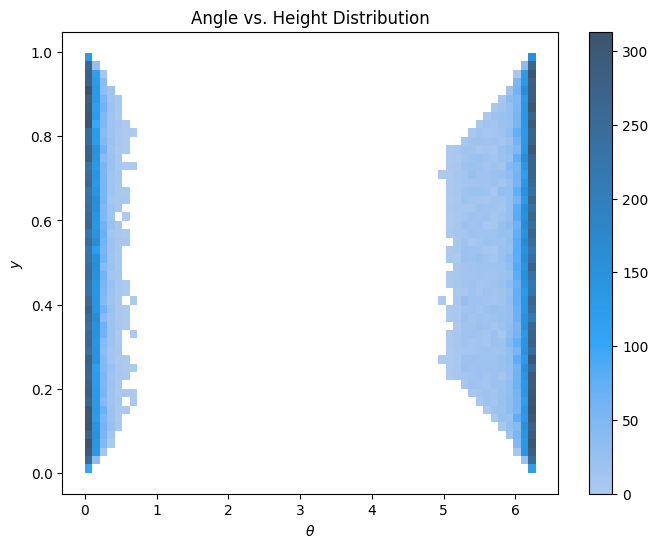

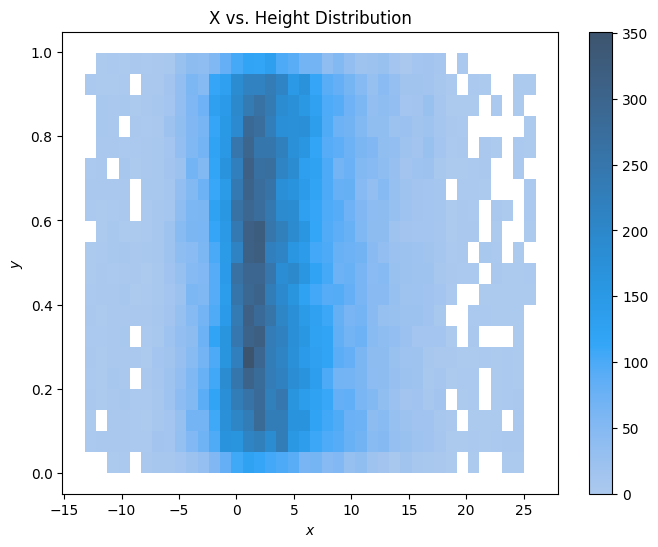

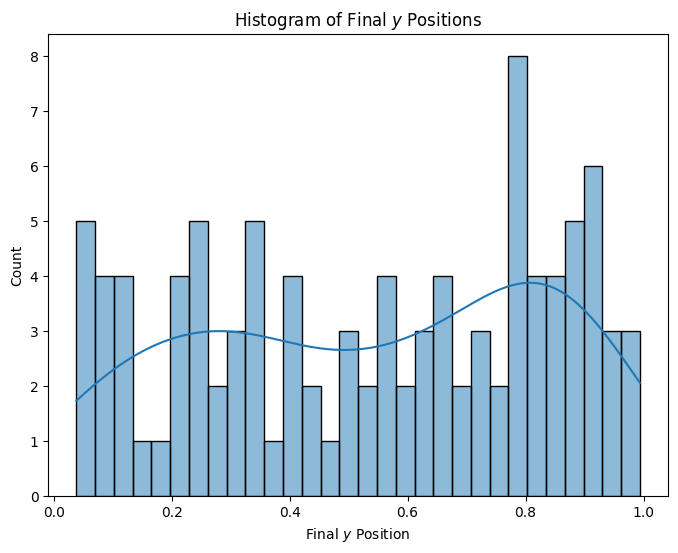

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the trajectories
ytrajs_flat = np.concatenate(ytrajs)  # Flatten y trajectories
θtrajs_flat = np.concatenate(θtrajs)  # Flatten theta (orientation)
xtrajs_flat = np.concatenate(xtrajs)  # Flatten x trajectories

# Plot y vs theta histogram
plt.figure(figsize=(8, 6))
sns.histplot(x=θtrajs_flat, y=ytrajs_flat, bins=(60, 50), cbar=True)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$y$')
plt.title('Angle vs. Height Distribution')
# plt.savefig(f"histoyth_D_T={D_T}_D_R={D_R}_v0={v0}_delta_t={dt}_T={T}_seeds={num_simulations}.png")

# Plot x vs y histogram
plt.figure(figsize=(8, 6))
sns.histplot(x=xtrajs_flat, y=ytrajs_flat, bins=(40, 20), cbar=True)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('X vs. Height Distribution')
# plt.savefig(f"histoxy_D_T={D_T}_D_R={D_R}_v0={v0}_delta_t={dt}_T={T}_seeds={num_simulations}.png")

plt.show()


# Extract final y-positions from each trajectory
final_y_positions = np.array([ytraj[-1] for ytraj in ytrajs])

# Plot histogram of final y positions
plt.figure(figsize=(8, 6))
sns.histplot(final_y_positions, bins=30, kde=True)
plt.xlabel(r'Final $y$ Position')
plt.ylabel('Count')
plt.title('Histogram of Final $y$ Positions')
plt.savefig(f"hist_final_y_D_T={D_T}_D_R={D_R}_v0={v0}_delta_t={dt}_T={T}_seeds={num_simulations}.png")

plt.show()


In [ ]:
# Code I got working

trajectory = np.zeros((steps, 3))
X, theta = X0, theta0
for it in range(steps):
    # print(it)
    # Update X based on theta
    dX = v0 * np.array([np.cos(theta), np.sin(theta)]) * dt + brownian_step * np.random.randn(2)
    dtheta = brownian_r_step * np.random.randn(1)
    Xn = X + dX
    thetan = theta + dtheta
    P1 = np.array([theta, X[1]])
    P2 = np.array([thetan[0], Xn[1]])
    while P2[1] - fbottom(P2[0], ell, channell) < 0: # Below bottom boundary
        print("Violated bottom boundary", P2, fbottom(P2[0], ell, channell))
        intersection = find_intersection(P1, P2, ell, channell, fbottom)
        if intersection is None:
            break
        print(intersection)
        P2 = give_ref(intersection, P2, ell, fbottomder)
        print("New coordinates", P2, )
        Xn[1] = P2[1]
        thetan = P2[0]

    while P2[1] - ftop(P2[0], ell, channell) > 0: # Above top boundary
        print("Violated top boundary", P2, ftop(P2[0], ell, channell))
        intersection = find_intersection(P1, P2, ell, channell, ftop)
        if intersection is None:
            break
        print("intersection", intersection)
        P2 = give_ref(intersection, P2, ell, ftopder)
        print("New coordinates", P2)
        Xn[1] = P2[1]
        thetan = P2[0]

In [127]:
# Properly understanding his code:

# const fbottom(θ,l,cl) = 0.5*l*abs(sin(θ))
# const fbottomder(θ,l) = 0.5*l*sin(θ)*cos(θ)/abs(sin(θ))
fbottom = lambda theta, l, cl: 0.5 * l * abs(np.sin(theta))
fbottomder = lambda theta, l, cl: 0.5 * l * np.sin(theta) * np.cos(theta)/abs(np.sin(theta))




/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32271/3831632517.py:6: RuntimeWarning: invalid value encountered in scalar divide
  fbottomder = lambda theta, l, cl: 0.5 * l * np.sin(theta) * np.cos(theta)/abs(np.sin(theta))


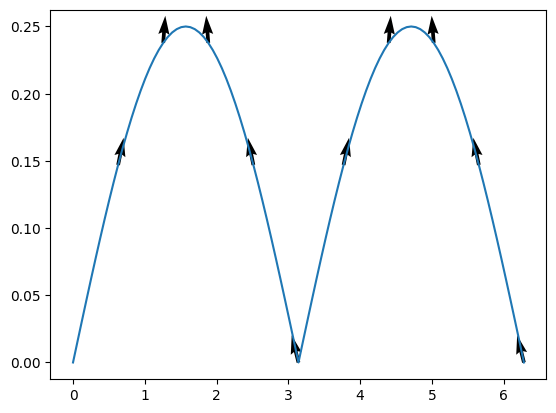

In [157]:
ell = 0.5; channell = 1.0
theta_grid = np.linspace(0, 2*np.pi, 101)
f_grid = np.array([fbottom(theta, ell, channell) for theta in theta_grid])
theta_norm_grid = np.array([theta for theta in np.linspace(0, 2*np.pi, 11)])
y_norm_grid = np.array([fbottom(theta, ell, channell) for theta in theta_norm_grid])
n = np.array([[1, fbottomder(theta, ell, channell)] for theta in theta_norm_grid])
# n = n/np.linalg.norm(n)
plt.plot(theta_grid, f_grid)
plt.quiver(theta_norm_grid, y_norm_grid, n[:, 0], n[:, 1])

In [161]:
norms = np.array([[-1*fbottomder(theta, ell, channell), 1] for theta in theta_norm_grid])
tangents = np.array([[1, fbottomder(theta, ell, channell)] for theta in theta_norm_grid])

/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_32271/3831632517.py:6: RuntimeWarning: invalid value encountered in scalar divide
  fbottomder = lambda theta, l, cl: 0.5 * l * np.sin(theta) * np.cos(theta)/abs(np.sin(theta))


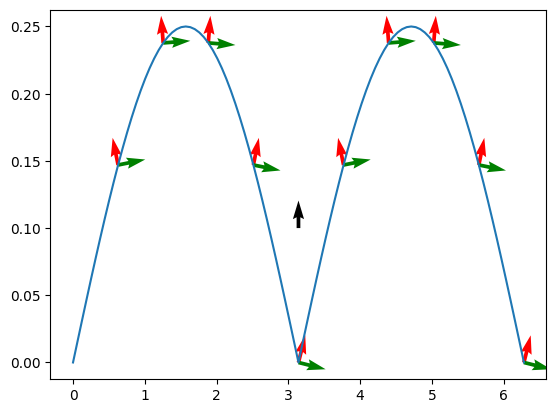

In [180]:
plt.plot(theta_grid, f_grid)
plt.quiver(theta_norm_grid, y_norm_grid, norms[:, 0], norms[:, 1], color='red')
plt.quiver(theta_norm_grid, y_norm_grid, tangents[:, 0], tangents[:, 1], color='green')
test_vectors = np.array([[0, 1], [1, 0]])
plt.quiver([np.pi], [0.1], test_vectors[0, 0], test_vectors[0, 1])
plt.show()

In [176]:
for i in range(11):
    print(np.dot(norms[i, :], tangents[i, :]))

nan
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
